# ROOT CAUSE ANALYSIS


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_excel(r"D:\Projects\VS code\Root cause analysis\Root cause analysis superstore data set.xlsx")

In [31]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Order Delivery (Days),Order Month/Year,Year,Ship Mode,Customer ID,Customer Name,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Cost
0,1,CA-2023-152156,2023-11-08,2023-11-11,3,Nov-23,2023,Second Class,CG-12520,Claire Gute,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,220.0464
1,2,CA-2023-152156,2023-11-08,2023-11-11,3,Nov-23,2023,Second Class,CG-12520,Claire Gute,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,512.3580
2,3,CA-2023-138688,2023-06-12,2023-06-16,4,Jun-23,2023,Second Class,DV-13045,Darrin Van Huff,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,7.7486
3,4,US-2022-108966,2022-10-11,2022-10-18,7,Oct-22,2022,Standard Class,SO-20335,Sean O'Donnell,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,1340.6085
4,5,US-2022-108966,2022-10-11,2022-10-18,7,Oct-22,2022,Standard Class,SO-20335,Sean O'Donnell,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,19.8516


In [32]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Order Delivery (Days)', 'Order Month/Year', 'Year', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Cost'],
      dtype='object')

In [33]:
df.describe()

,Row ID,Order Date,Ship Date,Order Delivery (Days),Year,Postal Code,Sales,Quantity,Discount,Cost
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2023-04-30 17:41:20.448268800,2023-04-23 22:48:14.696818176,3.958275,2022.722233,55190.379428,229.858001,3.789574,0.156203,201.201105
min,1.000000,2021-01-03 00:00:00,2018-01-01 00:00:00,0.000000,2021.000000,1040.000000,0.444000,1.000000,0.000000,0.554400
25%,2499.250000,2022-05-23 00:00:00,2022-05-15 06:00:00,3.000000,2022.000000,23223.000000,17.280000,2.000000,0.000000,12.688200
50%,4997.500000,2023-06-26 00:00:00,2023-06-24 00:00:00,4.000000,2023.000000,56430.500000,54.490000,3.000000,0.200000,41.664000
75%,7495.750000,2024-05-14 00:00:00,2024-05-12 00:00:00,5.000000,2024.000000,90008.000000,209.940000,5.000000,0.200000,182.226300
max,9994.000000,2024-12-30 00:00:00,2024-12-31 00:00:00,7.000000,2024.000000,99301.000000,22638.480000,14.000000,0.800000,24449.558400
std,2885.163629,NaN,NaN,1.747598,1.123555,32063.693350,623.245101,2.225110,0.206452,550.839414


In [34]:
# df.isnull().any().any()
df.isna().sum()



Row ID                   0
Order ID                 0
Order Date               0
Ship Date                0
Order Delivery (Days)    0
Order Month/Year         0
Year                     0
Ship Mode                0
Customer ID              0
Customer Name            0
Segment                  0
Country                  0
City                     0
State                    0
Postal Code              0
Region                   0
Product ID               0
Category                 0
Sub-Category             0
Product Name             0
Sales                    0
Quantity                 0
Discount                 0
Cost                     0
dtype: int64

### Region

In [35]:
Regions_Sales_pv =df.pivot_table(index='Region', columns='Year', values='Sales', aggfunc='sum')
Regions_Sales_pv['diff_2024'] = Regions_Sales_pv[2024] - Regions_Sales_pv[2023]
Regions_Sales_pv['growth_rate%'] = (Regions_Sales_pv['diff_2024'] / Regions_Sales_pv[2023]) * 100
Regions_Sales_pv = Regions_Sales_pv.round(2).reset_index()
Regions_Sales_pv

Year,Region,2021,2022,2023,2024,diff_2024,growth_rate%
0,Central,103838.16,102874.22,147429.38,147098.13,-331.25,-0.22
1,East,128680.46,156332.06,180685.82,213082.90,32397.08,17.93
2,South,103845.84,71359.98,93610.22,122905.86,29295.63,31.30
3,West,147883.03,139966.25,187480.18,250128.37,62648.19,33.42


#### Sales of Central has decreased in 2024 compared to 2023 by -0.22%


Text(0.5, 0, 'Region')

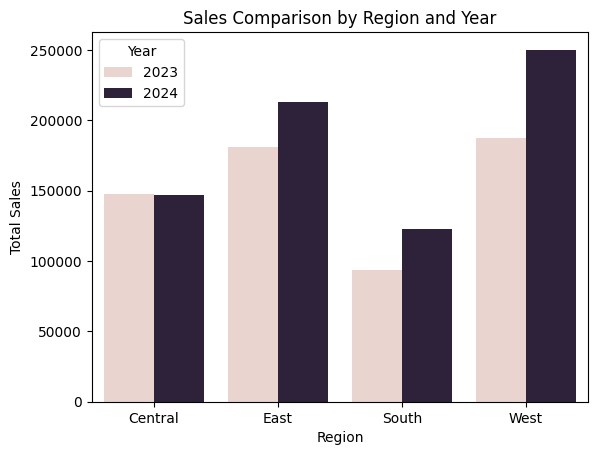

In [36]:
# Convert pivot table to long format for visualization using melt
Regions_Sales_long = Regions_Sales_pv.melt(
    id_vars='Region',
    value_vars=[2023,2024],
    var_name='Year',
    value_name='Sales'

)

sns.barplot(data=Regions_Sales_long,x= 'Region',y= 'Sales',hue='Year')
plt.title("Sales Comparison by Region and Year")  
plt.ylabel("Total Sales")                         
plt.xlabel("Region")     

### State


In [37]:
states_sales = df[(df['Region'] == 'Central') & (df['Year'] >= 2023)].pivot_table(index='State', columns='Year', values='Sales', aggfunc='sum').reset_index()
states_sales.isna().any()
states_sales.fillna(0, inplace=True)
states_sales['diff_2024'] = states_sales[2024] - states_sales[2023]
states_sales['growth_rate%'] = (states_sales['diff_2024'] / states_sales[2023]) * 100
states_sales = states_sales.round(2)
states_sales = states_sales.sort_values(by=['diff_2024','growth_rate%'], ascending=True).nsmallest(5, 'diff_2024')
states_sales

Year,State,2023,2024,diff_2024,growth_rate%
12,Wisconsin,13337.62,5567.47,-7770.15,-58.26
1,Indiana,25461.78,18516.45,-6945.33,-27.28
9,Oklahoma,8009.79,6225.91,-1783.88,-22.27
4,Michigan,27420.04,25833.65,-1586.39,-5.79
2,Iowa,959.31,716.41,-242.90,-25.32


In [38]:
big_states = states_sales.nsmallest(5, 'growth_rate%').reset_index()['State'].to_list()
big_states

['Wisconsin', 'Indiana', 'Iowa', 'Oklahoma', 'Michigan']

#### Top 5 states with the highest decrease in sales in 2024 compared to 2023 are:
*   Wisconsin 
*   Indiana
*   Oklahoma 
*   Michigan
*   Iowa

Text(0, 0.5, 'Total Sales')

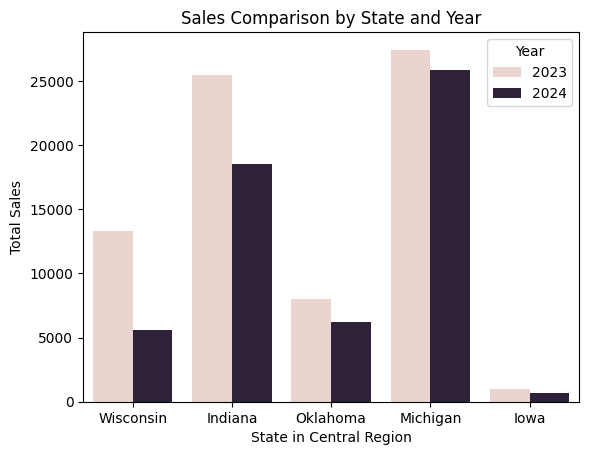

In [39]:
# Convert pivot table to long format for visualization using melt
states_sales_plot = states_sales.melt(
    id_vars= 'State',
    value_vars=[2023,2024],
    var_name= 'Year',
    value_name= 'Sales'
    )

sns.barplot(data=states_sales_plot,
            x='State',
            y='Sales',
            hue='Year'
    )

plt.title('Sales Comparison by State and Year')
plt.xlabel('State in Central Region')
plt.ylabel('Total Sales')

### City

In [40]:
## to calculate growth rate with condition for handling division by zero
def cal_growth_rate(row):
    if row[2024] == 0 or row[2023] == 0 :
        return row['diff_2024'] / 100
    return (row['diff_2024'] / row[2023]) * 100

In [41]:
cities_sales = df[(df['State'].isin(big_states)) & (df['Year'] >= 2023)].pivot_table(index=['State','City'], columns='Year', values='Sales', aggfunc='sum').reset_index().fillna(0)
cities_sales['diff_2024'] = cities_sales[2024] - cities_sales[2023]
cities_sales['growth_rate%'] = cities_sales.apply(cal_growth_rate, axis=1)
cities_sales = cities_sales.round(2).sort_values(by=['diff_2024','growth_rate%'], ascending=True).nsmallest(5, ['diff_2024','growth_rate%'])
big_cities_sales = cities_sales.nsmallest(5, ['diff_2024','growth_rate%']).reset_index()['City'].to_list()
big_cities_sales


['Lafayette', 'Detroit', 'Franklin', 'Noblesville', 'Appleton']

#### Top 5 cities with the highest decrease in sales in 2024 compared to 2023 are:

*   Lafayette 
*   Detroit 
*   Franklin 
*   Noblesville 
*   Appleton

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Lafayette'),
  Text(1, 0, 'Detroit'),
  Text(2, 0, 'Franklin'),
  Text(3, 0, 'Noblesville'),
  Text(4, 0, 'Appleton')])

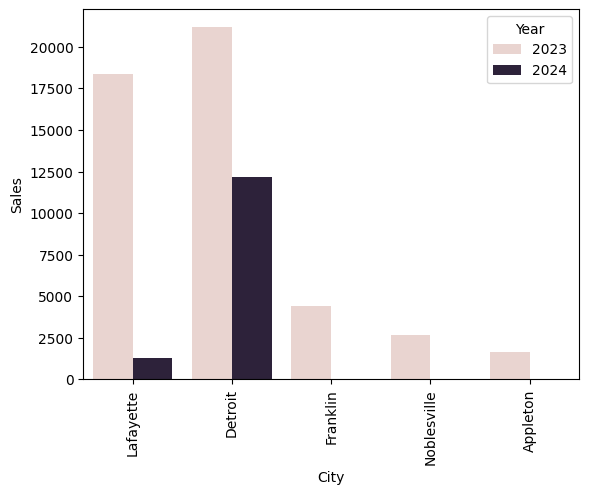

In [42]:
# Convert pivot table to long format for visualization using melt
cities_sales_plot = cities_sales.melt(
    id_vars=['State','City'],
    value_vars= [2023,2024],
    var_name='Year',
    value_name='Sales'
)
cities_sales_plot

sns.barplot(
    data=cities_sales_plot,
    x= 'City',
    y='Sales',
    hue='Year'
    )
plt.xticks(rotation= 90)

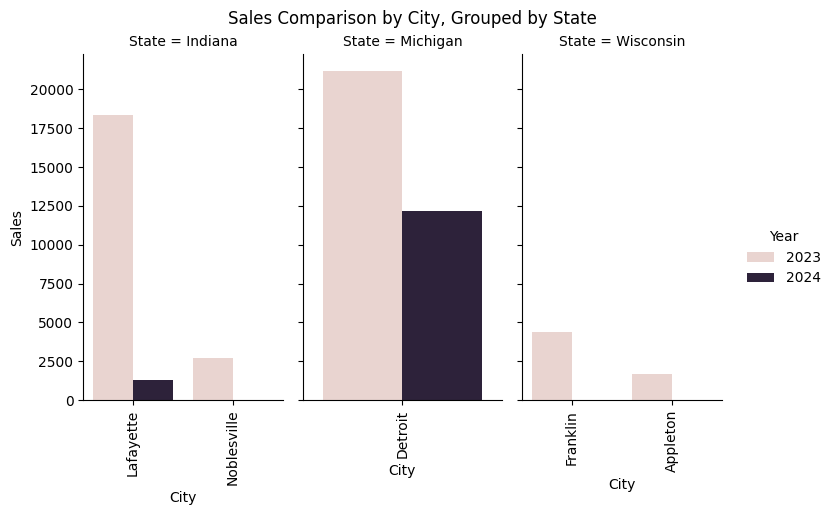

Year      State         City      2023      2024  diff_2024  growth_rate%
6       Indiana    Lafayette  18358.14   1266.37  -17091.77        -93.10
21     Michigan      Detroit  21197.32  12148.89   -9048.43        -42.69
44    Wisconsin     Franklin   4377.71      3.60   -4374.11        -99.92
9       Indiana  Noblesville   2678.94      0.00   -2678.94        -26.79
42    Wisconsin     Appleton   1649.75      0.00   -1649.75        -16.50


In [43]:

g = sns.catplot(
    data=cities_sales_plot,
    x='City',     
    y='Sales',
    hue='Year',    
    col='State', 
    kind='bar',    
    col_wrap= 3,
    height=5, 
    aspect=0.5,     
    sharex=False
    )
g.set_xticklabels(rotation=90) 

g.tight_layout()

plt.suptitle('Sales Comparison by City, Grouped by State', y=1.02)
plt.show()
print(cities_sales)

---

### Category and Sub category

In [44]:
category_sales = df[(df['State'].isin(big_states)) & (df['Year'] >= 2023) & (df['City'].isin(big_cities_sales))].pivot_table(index=['Category', 'Sub-Category','Product Name'], columns='Year', values='Sales',aggfunc='sum').reset_index().fillna(0)
category_sales['diff_2024'] = category_sales[2024] - category_sales[2023]
category_sales = category_sales.sort_values(by='diff_2024', ascending=True)
big_category_sales = category_sales.nsmallest(5,'diff_2024').round(2)

# Analyze the impact of each category on sales decline
for category in big_category_sales['Category'].unique():
    category_sum = big_category_sales[big_category_sales['Category'] == category]['diff_2024'].sum()
    print(f'category: {category} is affecting on Sales by {category_sum.round(2)}')

category: Technology is affecting on Sales by -17499.95
category: Office Supplies is affecting on Sales by -9892.74
category: Furniture is affecting on Sales by -7836.78


<Axes: xlabel='Category', ylabel='Sales'>

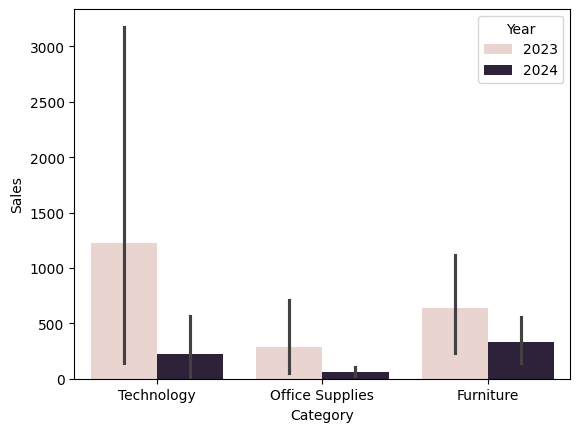

In [45]:
view_category = category_sales.melt(
    id_vars=['Category','Sub-Category'],
    value_vars=[2023,2024],
    var_name='Year',
    value_name='Sales'  
)

sns.barplot(
    data=view_category,
    x='Category',
    y='Sales',
    hue='Year'
    )

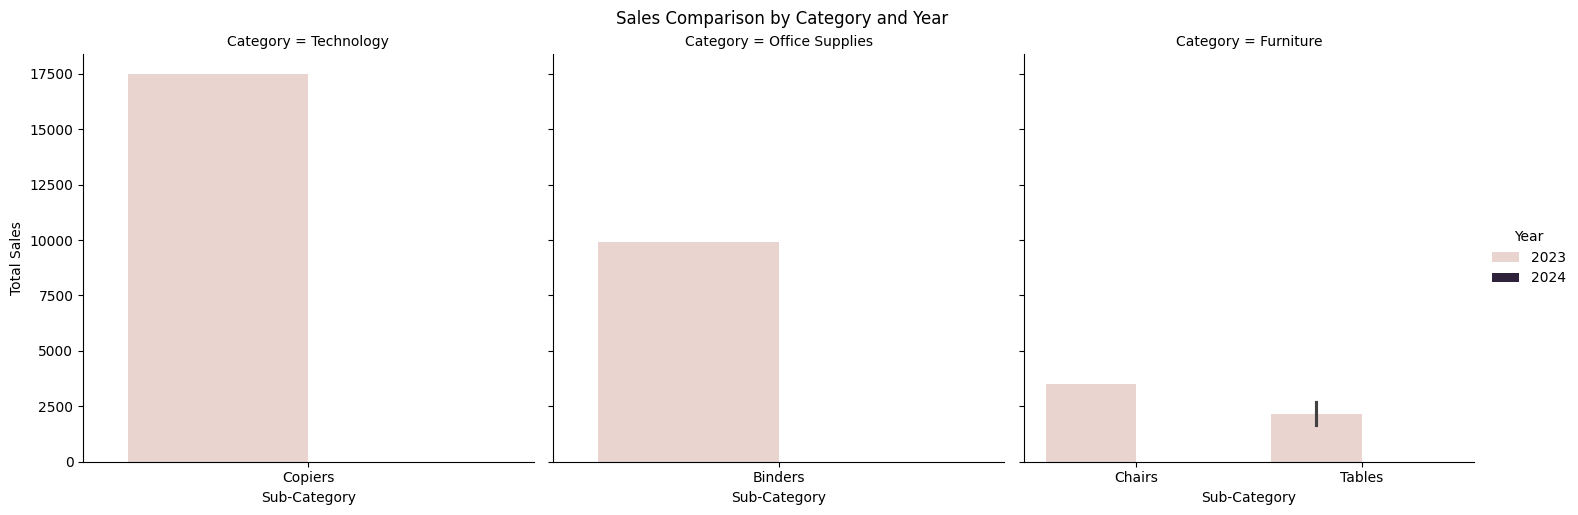

In [46]:
big_category_plot = big_category_sales.melt(
    id_vars=['Category','Sub-Category'],
    value_vars=[2023,2024],
    var_name='Year',
    value_name='Sales'
    )
g = sns.catplot(
    data=big_category_plot,
    x='Sub-Category',
    y='Sales',
    hue='Year',
    kind='bar',
    col='Category',
    sharex=False

    
    )

g.fig.suptitle('Sales Comparison by Category and Year', y=1.02)
g.set_axis_labels('Sub-Category', 'Total Sales')


### Products 

In [47]:
# Get the products name that impact on sales decline
big_product_sales = category_sales.nsmallest(5,'diff_2024').round(2).reset_index()['Product Name'].to_list()
big_product_sales


['Canon imageCLASS 2200 Advanced Copier',
 'GBC Ibimaster 500 Manual ProClick Binding System',
 'HON 5400 Series Task Chairs for Big and Tall',
 'Balt Solid Wood Round Tables',
 'Chromcraft Bull-Nose Wood Oval Conference Tables & Bases']

#### Top 5 Products with the highest decrease in sales (doesn't has Sales at all) in 2024 compared to 2023 are:

##### Technology:
*   Canon ImageCLASS 2200 Advanced Copier
##### Office Supplies:
*   GBC Ibimaster 500 Manual ProClick Binding System
##### Furniture:
*   HON 5400 Series Task Chairs for Big and Tall
*   Balt Solid Wood Round Tables
*   Chromcraft Bull-Nose Wood Oval Conference Tables & Bases

Text(0.5, 0, 'Total Sales')

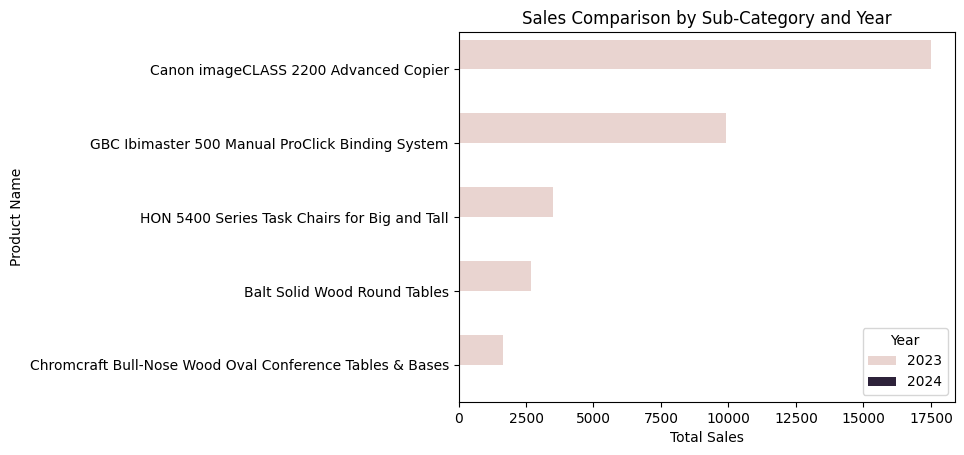

In [48]:
big_products_sales = big_category_sales.melt(
    id_vars='Product Name',
    value_vars=[2023,2024],
    var_name='Year',
    value_name='Sales'
)
sns.barplot(
    data=big_products_sales,
    x='Sales',
    y='Product Name',
    hue='Year'
    )


plt.title('Sales Comparison by Sub-Category and Year')
plt.xlabel('Total Sales')

### Customer and Segmant

In [49]:
# Analyze the customer and segment that impact on sales decline
customer_segmant_cause = df[(df['Product Name'].isin(big_product_sales)) & (df['State'].isin(big_states)) & (df['Year'] >= 2023) & (df['City'].isin(big_cities_sales))].pivot_table(index=['Customer Name', 'Segment', 'Customer ID','Product Name'], columns= 'Year',values='Sales', aggfunc='sum').reset_index().sort_values(by=2023,ascending=False)
customer_segmant_cause

Year,Customer Name,Segment,Customer ID,Product Name,2023
4,Tamara Chand,Corporate,TC-20980,Canon imageCLASS 2200 Advanced Copier,17499.95
0,Adrian Barton,Consumer,AB-10105,GBC Ibimaster 500 Manual ProClick Binding System,9892.74
2,Laura Armstrong,Corporate,LA-16780,HON 5400 Series Task Chairs for Big and Tall,3504.90
1,Alejandro Savely,Corporate,AS-10285,Balt Solid Wood Round Tables,2678.94
3,Michael Paige,Corporate,MP-17965,Chromcraft Bull-Nose Wood Oval Conference Tabl...,1652.94


#### Top Customers and Segments with the highest decrease in sales in 2024 compared to 2023 are:
*   Customer Name: Adrian Barton, Segment: Consumer
*   Customer Name: Tamara Chand, Segment: Corporate
*   Customer Name: Alejandro Savely, Segment: Corporate 
*   Customer Name: Laura Armstrong, Segment: Corporate
*   Customer Name: Michael Paige, Segment: Corporate


<Axes: xlabel='Segment', ylabel='Sales'>

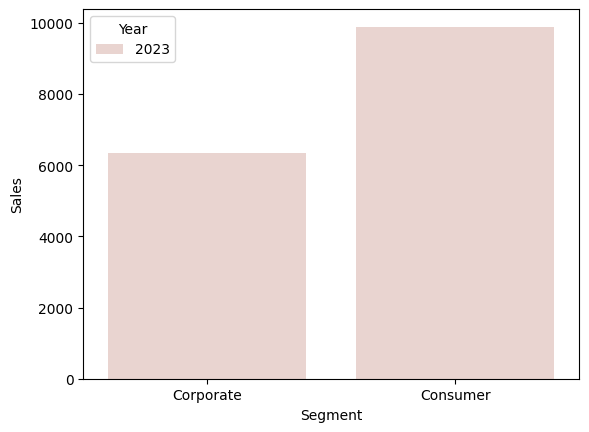

In [50]:
# Convert pivot table to long format for visualization using melt and only shown the 2023 Sales which the only has this sales for the selected segments 
customer_plot = customer_segmant_cause.melt(
    id_vars=['Customer Name', 'Segment', 'Customer ID','Product Name'],
    value_vars=2023,
    var_name='Year', 
    value_name='Sales'
)   

sns.barplot(
    data=customer_plot, 
    x='Segment',
    y='Sales',
    hue='Year',
    errorbar=None    
)


### Orders and Order Delivery

In [51]:
order_cou_sales = df[(df['Region'] == 'Central') & (df['Year']>=2023)].pivot_table(index=['Region','Order Delivery (Days)'],columns='Year',values=['Order ID','Sales'],aggfunc={'Order ID':'count','Sales':'sum'}).reset_index()
order_cou_sales['diff_ord_2024'] = order_cou_sales['Order ID', 2024] - order_cou_sales['Order ID', 2023]
order_cou_sales['diff_sales_2024'] = order_cou_sales['Sales', 2024] - order_cou_sales['Sales', 2023]
order_cou_sales.round(2)

Region Order Delivery (Days) Order ID          Sales            \
Year                                    2023 2024      2023      2024   
0     Central                     0       20   52   4676.27   8139.97   
1     Central                     1       15   28   1748.23   5110.62   
2     Central                     2       72  101  16841.73  22728.64   
3     Central                     3       51   82   7527.91  14329.82   
4     Central                     4      178  189  49218.56  32143.79   
5     Central                     5      151  161  29374.64  40058.51   
6     Central                     6       89  120  14653.29  17730.19   
7     Central                     7       27   45  23388.74   6856.59   

     diff_ord_2024 diff_sales_2024  
Year                                
0               32         3463.70  
1               13         3362.39  
2               29         5886.91  
3               31         6801.90  
4               11       -17074.77  
5               10        10683.87  
6               31         3076.90  
7               18       -16532.15

### Month to descrese in sales

In [ ]:
df['Month'] = pd.to_datetime(df['Order Date'],format="%Y-%m-%d").dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=False)

month_sales = df[(df['Region'] == 'Central')  & (df['State'].isin(big_states)  & (df['City'].isin(big_cities_sales)))].pivot_table(index='Month',columns= 'Year',values='Sales', aggfunc='sum').reset_index()
month_sales['diff_2024'] = month_sales[2024] - month_sales[2023]
month_sales['growth_rate%'] = month_sales.apply(cal_growth_rate, axis=1)
month_sales.round(2).sort_values(by='diff_2024')

C:\Users\Ard Al Jood\AppData\Local\Temp\ipykernel_9588\975380436.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  month_sales = df[(df['Region'] == 'Central')  & (df['State'].isin(big_states)  & (df['City'].isin(big_cities_sales)))].pivot_table(index='Month',columns= 'Year',values='Sales', aggfunc='sum').reset_index()


Year,Month,2021,2022,2023,2024,diff_2024,growth_rate%
9,October,0.00,1560.25,20017.89,85.52,-19932.37,-99.57
11,December,114.20,1929.81,14499.86,3774.45,-10725.41,-73.97
10,November,407.61,1669.01,3920.31,181.86,-3738.45,-95.36
4,May,21.56,925.83,3984.97,2049.53,-1935.44,-48.57
7,August,0.00,957.88,1220.73,53.72,-1167.01,-95.60
6,July,0.00,0.00,1311.03,526.45,-784.58,-59.84
8,September,103.60,42.32,1111.96,498.26,-613.70,-55.19
1,February,0.00,0.00,0.00,0.00,0.00,0.00
3,April,84.83,180.96,523.18,661.66,138.48,26.47
5,June,914.65,774.47,0.00,1052.34,1052.34,10.52


Text(0.5, 1.0, 'Monthly Sales Trend in Central Region for All Years')

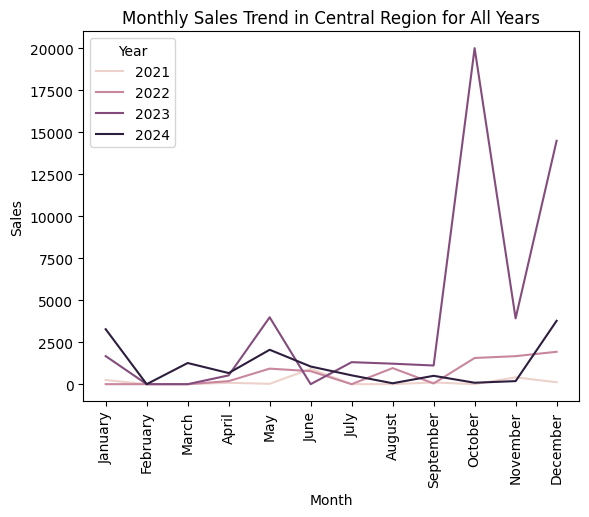

In [55]:
month_sales_plot = month_sales.melt(
    id_vars= 'Month',
    value_vars= [2021,2022,2023, 2024],
    var_name= 'Year',
    value_name='Sales'
)

sns.lineplot(month_sales_plot, 
             x='Month',
             y='Sales',
             hue='Year'
             ) 
plt.xticks(rotation=90)
plt.title('Monthly Sales Trend in Central Region for All Years')
